## AGN TimeLags Metrics

We designed a metric $\log \phi_{\mathcal{T}}$ for time-lags and periodicities that identifies smooth trends (i.e. hyperplanes or linear
relations) in complex datasets. This scaling relation ties relative formal error of measured time scale $\mathcal{T}_{obs}$ ∈ $(\tau,P)$
to the characteristics of AGN light curve and OpSim cadendes: the amplitude of flux variation $F_{var}$ relative to the
measured flux (or photometric) error $\sigma$: ($\frac{F_{var}}{\sigma}$) the ratio of observed time scale $\mathcal{T}_{obs}$ ∈  $(\tau,P)$ and light curve sampling
time $\Delta t$: ($\frac{\mathcal{T}_{obs}}{\Delta t}$) . The proposed metric is:

$\log \phi_{\mathcal{T}} = \log \frac{\sigma_{\mathcal{T}}}{\mathcal{T}} \varpropto A + C_1 \frac{F_{var}}{\sigma} + C_2 \frac{\mathcal{T}_{obs}}{(1+z) \Delta t}$, 
    

where we assume that the error of the rest-frame time lag or periodicity inferred from the observed light curve will be increasing with an increasing redshift of the object for the same observed time scale and sampling time. The metric coefficients tell us how to compare variables on a given ensemble of objects. Measuring the observables and their uncertainties for each object, we can estimate metric (i.e., coefficients $A$,$C_1$,$C_2$) for given AGN light curves ensemble generated from OpSim cadences and probability density function (PDF) of the metric.


In this metric we are evaluating the ratio of observed time scale and light curve sampling time, to calculate if proposed cadence is sufficient for the detection of the given time lag. Also, we added the magnitude-limit in r and g filters. The magnitudes were corrected for the dust-extinction.


$\mathrm{M} =  \frac{\mathcal{T}_{obs}}{(1+z) \Delta t}$

Some common values for time lag for accretion disks varies between 0 and 5 days, while for the BLR it is from 5 to 300 days.

In [1]:
import rubin_sim.maf as maf
import os
import numpy as np
import math

In [2]:
from AGN_TimeLagMetric import *
%matplotlib inline

In [3]:
from rubin_sim.data import get_baseline

opsim_fname = get_baseline()
print(opsim_fname)

runName = os.path.split(opsim_fname)[-1].replace('.db', '')
print(runName)

opsim_db = maf.OpsimDatabase(opsim_fname)


/home/viktor/rubin_sim_data/sim_baseline/baseline_nexp2_v1.7_10yrs.db
baseline_nexp2_v1.7_10yrs


#### Basic metric usage example

In [10]:

nside = 32
slicer = maf.HealpixSlicer(nside)
lag = 15

#Create metric instance
metric=AGN_TimeLagMetric(10)

# Additional contraints
sqlconstraint = 'filter = \'' + 'r' + '\''
bundle = maf.MetricBundle(metric, slicer, sqlconstraint, runName=runName)
outDir = 'TmpDir'
resultsDb = maf.ResultsDb(outDir=outDir)
bgroup = maf.MetricBundleGroup({'test_metric': bundle}, opsim_db, outDir= outDir)

# Run simulation
bgroup.runAll()


Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database SummaryAllProps with constraint filter = 'r' for columns ['observationStartMJD', 'fieldDec', 'filter', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos']
Found 452001 visits
Running:  ['test_metric']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


0.0 180.0 -180.0 180.0


1

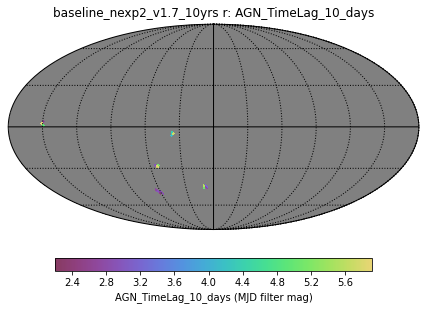

In [11]:
# Plot data
maxVal = (np.nanmax(bundle.metricValues))
plotDict = {'nside': nside, 'colorMin': 2.2, 'colorMax': maxVal }
plotFunc = maf.plots.HealpixSkyMap()
ph = maf.plots.PlotHandler(outDir=outDir, figformat='png', thumbnail=False)

ph.setMetricBundles([bundle])
ph.plot(plotFunc=plotFunc, plotDicts=plotDict)

### Accretion disk time lag example

Common values for time lags for accretion disks varies between 0 and 5 days. References: <a href="https://ui.adsabs.harvard.edu/abs/2016MNRAS.456.1960S/abstract"> Starkey et al., 2016 </a>, <a href="https://www.aanda.org/articles/aa/full_html/2020/04/aa35423-19/aa35423-19.html#R24"> Chan et al., 2019 </a>

In [12]:


nside = 32
slicer = maf.HealpixSlicer(nside)
# sqlconstraint = 'filter = \'' + 'r' + '\''
outDir = 'TmpDir'
resultsDb = maf.ResultsDb(outDir=outDir)
name = runName
bundles = {}
for lag in range(1,6,1):
    metric=AGN_TimeLagMetric(lag)
    n = name + ' Lag ' + str(lag) 
    bundle = maf.MetricBundle(metric, slicer, sqlconstraint, runName=n)
    bundles['Lag ' + str(lag)] = bundle


bgroup = maf.MetricBundleGroup(bundles, opsim_db, outDir= outDir)

# Run simulation
bgroup.runAll()



Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database SummaryAllProps with constraint filter = 'r' for columns ['observationStartMJD', 'fieldDec', 'filter', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos']
Found 452001 visits
Running:  ['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: UserWarning: Warning: converting a masked element to nan.
  ar = np.asanyarray(ar)
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/fromnumeric.py:997: UserWarning: Warning: converting a masked element to nan.
  a = asanyarray(a).copy(order="K")
0.0 180.0 -180.0 180.0
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: UserWarning: Warning: converting a masked element to nan.
  ar = np.asanyarray(ar)
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/fromnumeric.py:997: UserWarning: Warning: converting a masked element to nan.
  a = asanyarray(a).copy(order="K")
0.0 180.0 -180.0 180.0
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: UserWarning: Warning: converting a masked element to nan.
  ar = np.asanyarray(ar)
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-pa

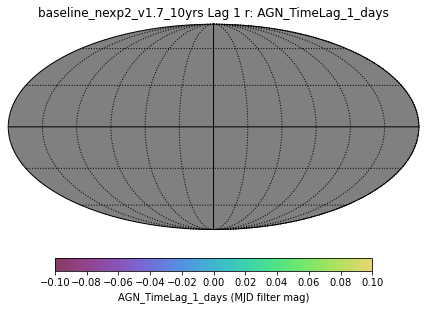

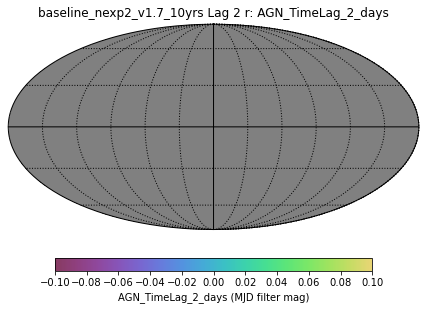

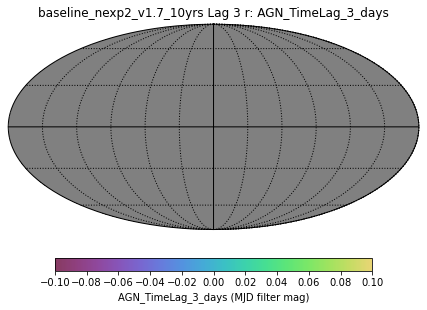

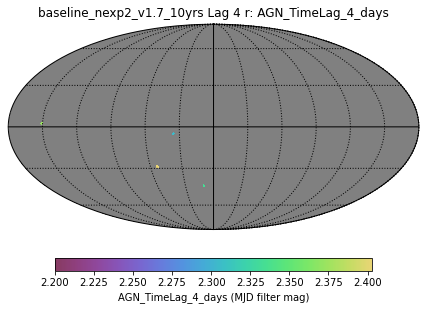

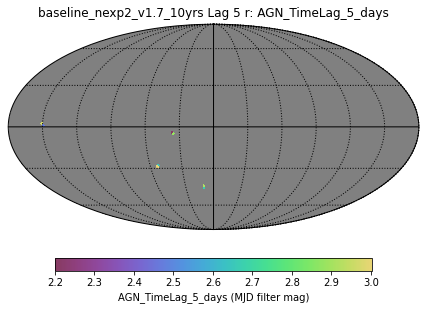

In [13]:
# Plot data
plotFunc = maf.plots.HealpixSkyMap()
for key in bundles:
    maxVal = (np.nanmax(bundles[key].metricValues))
    plotDict = {'nside': nside, 'colorMin': 2.2, 'colorMax': maxVal }
    ph = maf.plots.PlotHandler(outDir=outDir, figformat='png', thumbnail=False)
    ph.setMetricBundles([bundles[key]])
    ph.plot(plotFunc=plotFunc, plotDicts=plotDict)



### Broad line region time lag example

Broad line region (BLR) has values between 5 and 300 days.

In [14]:
values = [ 10, 20, 30, 40, 50, 75, 80, 85, 90, 100]

nside = 32
slicer = maf.HealpixSlicer(nside)
# sqlconstraint = 'filter = \'' + 'r' + '\''
outDir = 'TmpDir'
resultsDb = maf.ResultsDb(outDir=outDir)
name = runName
bundles = {}
for lag in values:
    metric=AGN_TimeLagMetric(lag)
    n = name + ' Lag ' + str(lag) 
    bundle = maf.MetricBundle(metric, slicer, sqlconstraint, runName=n)
    bundles['Lag ' + str(lag)] = bundle


bgroup = maf.MetricBundleGroup(bundles, opsim_db, outDir= outDir)

# Run simulation
bgroup.runAll()


Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database SummaryAllProps with constraint filter = 'r' for columns ['observationStartMJD', 'fieldDec', 'filter', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos']
Found 452001 visits
Running:  ['Lag 10', 'Lag 20', 'Lag 30', 'Lag 40', 'Lag 50', 'Lag 75', 'Lag 80', 'Lag 85', 'Lag 90', 'Lag 100']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


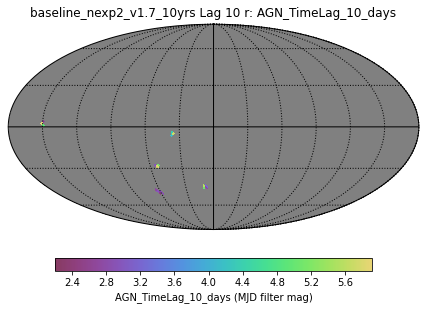

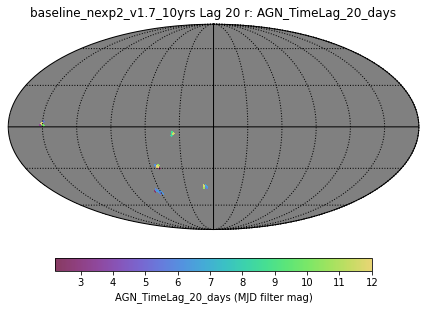

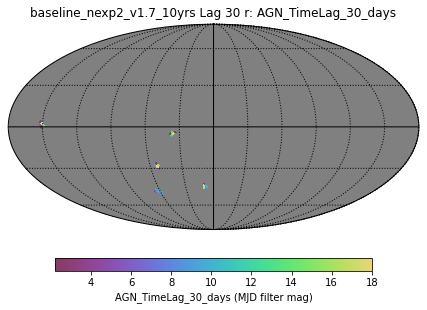

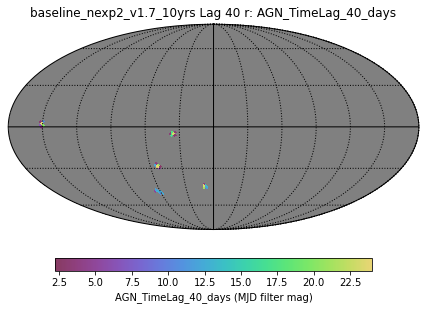

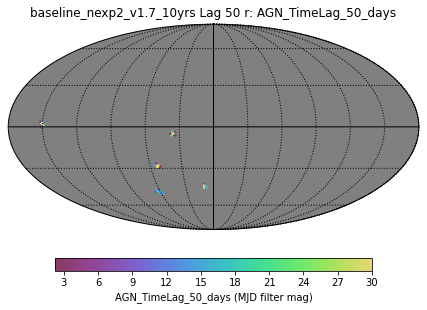

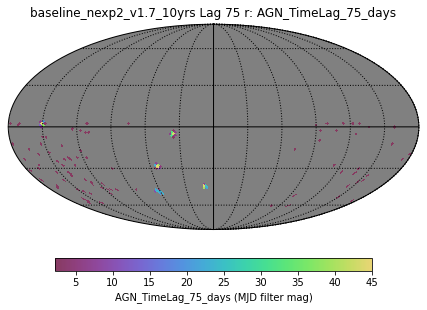

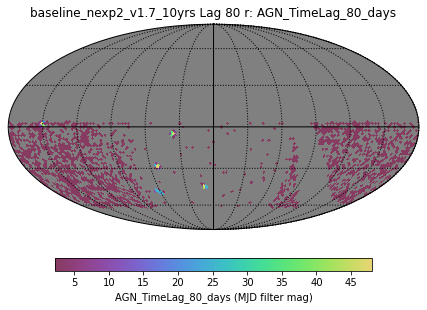

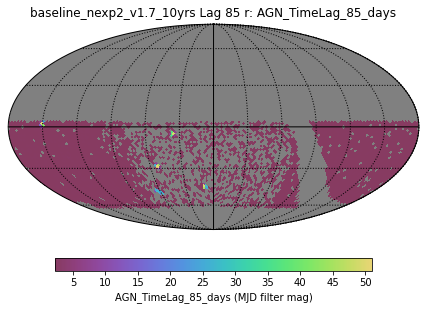

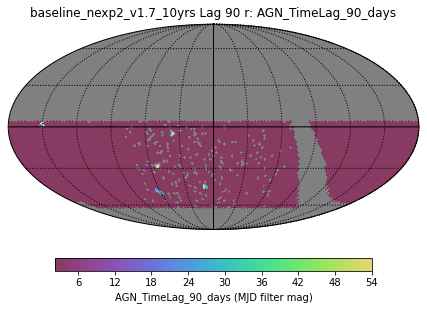

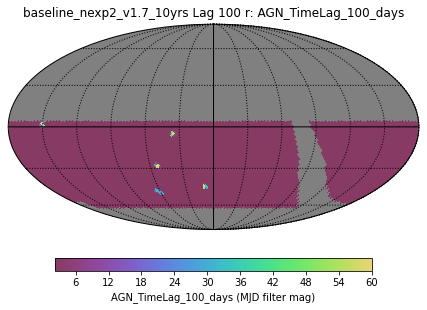

In [15]:
# Plot data
plotFunc = maf.plots.HealpixSkyMap()
for key in bundles:
    maxVal = (np.nanmax(bundles[key].metricValues))
    plotDict = {'nside': nside, 'colorMin': 2.2, 'colorMax': maxVal }
    ph = maf.plots.PlotHandler(outDir=outDir, figformat='png', thumbnail=False)
    ph.setMetricBundles([bundles[key]])
    ph.plot(plotFunc=plotFunc, plotDicts=plotDict)



0.0 180.0 -180.0 180.0


Plotting figures with "filter = 'r'" constraint now.


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/home/viktor/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 4356 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0
/home/viktor/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 3239 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0
/home/viktor/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 2712 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0
/home/viktor/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculatio

Plotting complete.


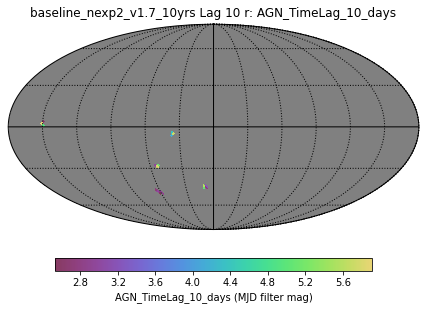

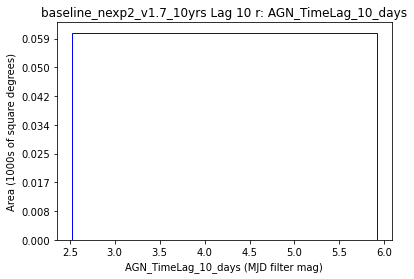

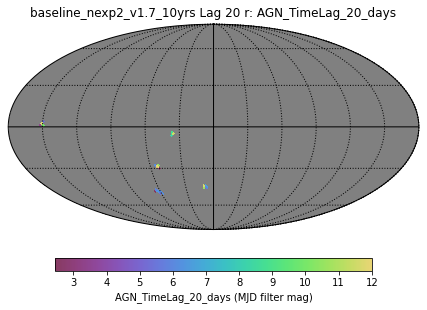

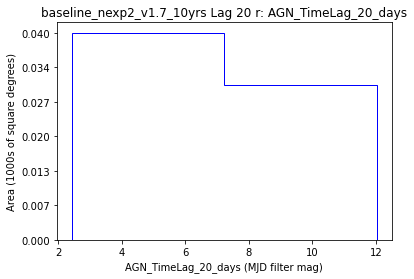

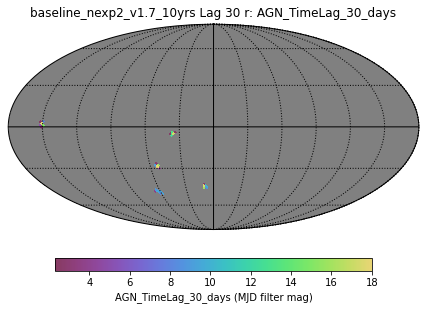

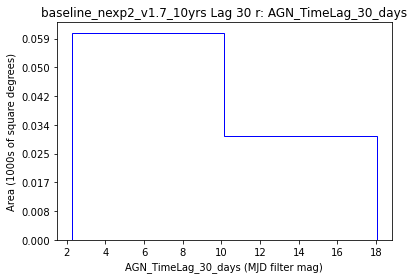

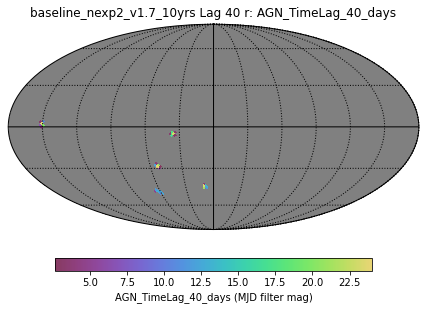

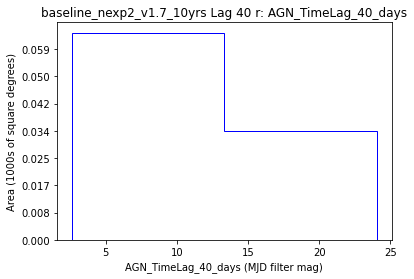

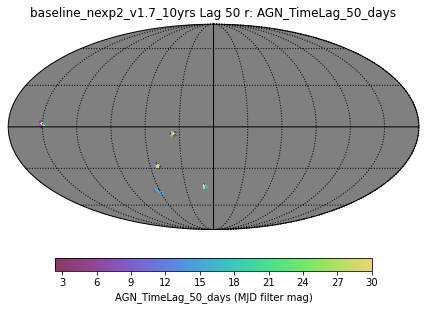

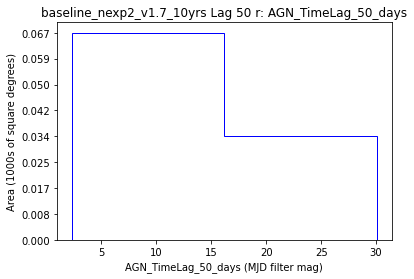

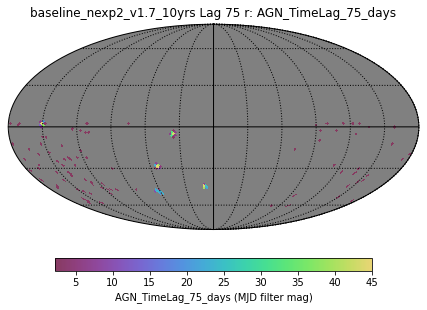

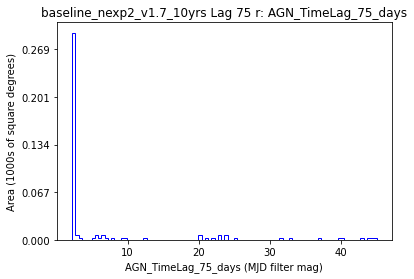

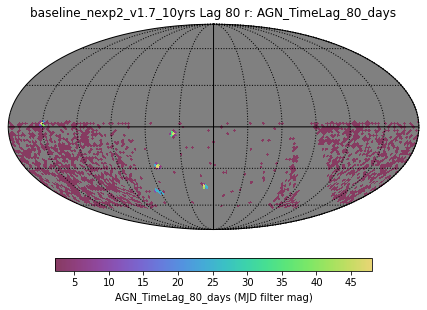

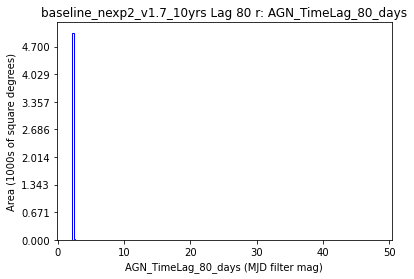

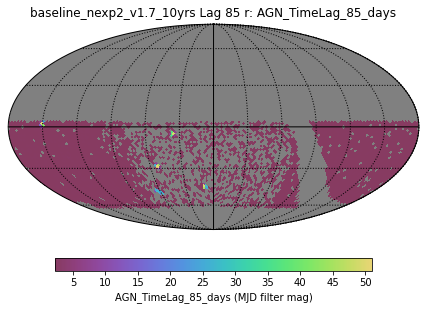

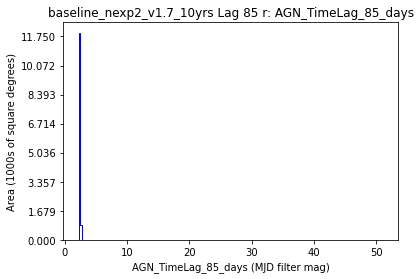

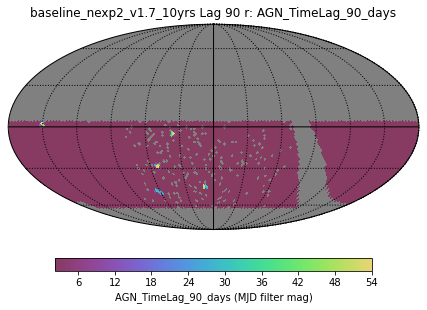

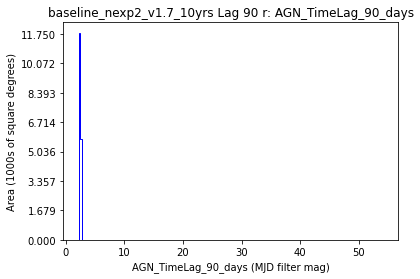

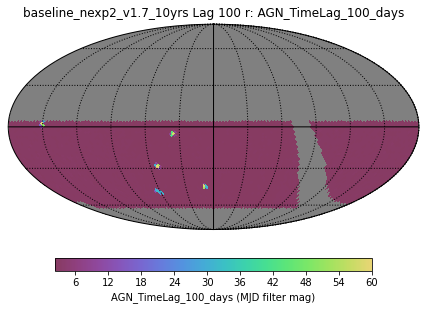

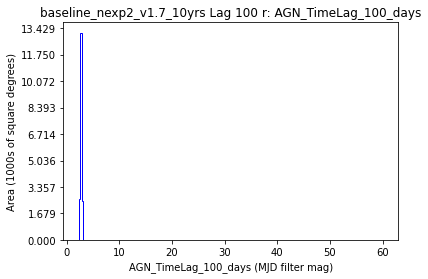

In [16]:
%matplotlib inline
bgroup.plotAll(closefigs=False)